In [1]:
import cv2
import matplotlib.pyplot as plt

In [13]:
images = []

for i in range(1,8):
    images.append(cv2.resize(cv2.imread(f'data/img{i}.jpg', cv2.IMREAD_GRAYSCALE), (256, 256)))

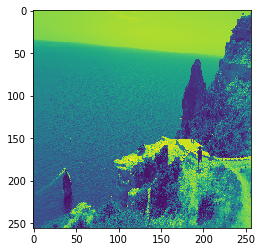

In [14]:
plt.imshow(images[0]);

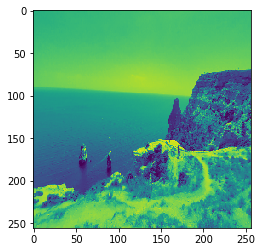

In [15]:
plt.imshow(images[1]);

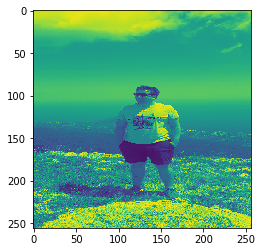

In [20]:
plt.imshow(images[2]);

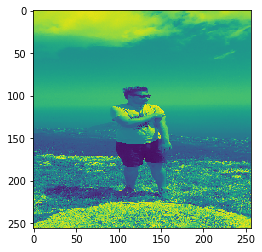

In [21]:
plt.imshow(images[3]);

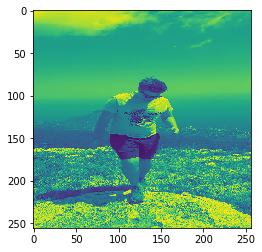

In [24]:
plt.imshow(images[4]);

In [16]:
def calc_similarities(img1, img2):
    sift = cv2.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)

    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

    #img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #plt.imshow(img3)
    return good, kp1, kp2

In [17]:
def calc_score(matches, kp1, kp2):
    return 100 * (len(matches)/ min(len(kp1), len(kp2)))

**Сравним картинки**

In [18]:
matches, kp1, kp2 = calc_similarities(images[0], images[1])
calc_score(matches, kp1, kp2)

16.36904761904762

In [19]:
matches, kp1, kp2 = calc_similarities(images[2], images[3])
calc_score(matches, kp1, kp2)

11.11111111111111

In [22]:
matches, kp1, kp2 = calc_similarities(images[3], images[4])
calc_score(matches, kp1, kp2)

5.241935483870968

In [23]:
matches, kp1, kp2 = calc_similarities(images[2], images[4])
calc_score(matches, kp1, kp2)

3.225806451612903

In [25]:
matches, kp1, kp2 = calc_similarities(images[5], images[6])
calc_score(matches, kp1, kp2)

34.5

In [26]:
matches, kp1, kp2 = calc_similarities(images[0], images[2])
calc_score(matches, kp1, kp2)

0.7936507936507936

In [27]:
matches, kp1, kp2 = calc_similarities(images[1], images[2])
calc_score(matches, kp1, kp2)

0.3968253968253968

In [29]:
matches, kp1, kp2 = calc_similarities(images[2], images[6])
calc_score(matches, kp1, kp2)

0.7936507936507936

**Действительно, похожие картинки имеют скор больший 1, а непохожие - меньший 1**